In [2]:
!pip install xgboost catboost pandas scikit-learn gradio scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
)

from xgboost import XGBClassifier

from catboost import CatBoostClassifier

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

In [ ]:

data_path = '/content/Disease_symptom_and_patient_profile_dataset.csv'
df = pd.read_csv(data_path)

In [ ]:
print(df.head())
print(df.shape)

       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive  
(349, 10)


In [ ]:
df['Fever'] = df['Fever'].map({'Yes': 1, 'No': 0})
df['Cough'] = df['Cough'].map({'Yes': 1, 'No': 0})
df['Fatigue'] = df['Fatigue'].map({'Yes': 1, 'No': 0})
df['Difficulty Breathing'] = df['Difficulty Breathing'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Blood Pressure'] = df['Blood Pressure'].map({'Normal': 1, 'High': 2, 'Low': 0})
df['Cholesterol Level'] = df['Cholesterol Level'].map({'Normal': 1, 'High': 2, 'Low': 0})
df['Outcome Variable'] = df['Outcome Variable'].map({'Positive': 1, 'Negative': 0})

In [ ]:

X = df.drop(columns=['Disease', 'Outcome Variable'])
y = df['Outcome Variable']

In [ ]:
print(X.head())
print(y.head())

   Fever  Cough  Fatigue  Difficulty Breathing  Age  Gender  Blood Pressure  \
0      1      0        1                     1   19       1               0   
1      0      1        1                     0   25       1               1   
2      0      1        1                     0   25       1               1   
3      1      1        0                     1   25       0               1   
4      1      1        0                     1   25       0               1   

   Cholesterol Level  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
0    1
1    0
2    0
3    1
4    1
Name: Outcome Variable, dtype: int64


In [ ]:
df['Risk Factor'] = (df['Age'] > 60).astype(int) + (df['Blood Pressure'] > 1).astype(int) + (df['Cholesterol Level'] > 1).astype(int)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:44:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
Best CatBoost parameters: {'depth': 10, 'iterations': 500, 'learning_rate': 0.01}
Logistic Regression Accuracy: 0.63
Random Forest Accuracy: 0.80


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:44:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.73
CatBoost Accuracy: 0.76

Best Model: RandomForestClassifier with accuracy 0.80

Final Model Evaluation:
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.81      0.81      0.81        37

    accuracy                           0.80        70
   macro avg       0.80      0.80      0.80        70
weighted avg       0.80      0.80      0.80        70

Confusion Matrix:
 [[26  7]
 [ 7 30]]
ROC-AUC Score: 0.8484848484848485

Best Model: RandomForestClassifier with accuracy 0.80


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:44:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Accuracy: 0.77

Final Model Evaluation:
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.81      0.81      0.81        37

    accuracy                           0.80        70
   macro avg       0.80      0.80      0.80        70
weighted avg       0.80      0.80      0.80        70

Confusion Matrix:
 [[26  7]
 [ 7 30]]
ROC-AUC Score: 0.8484848484848485


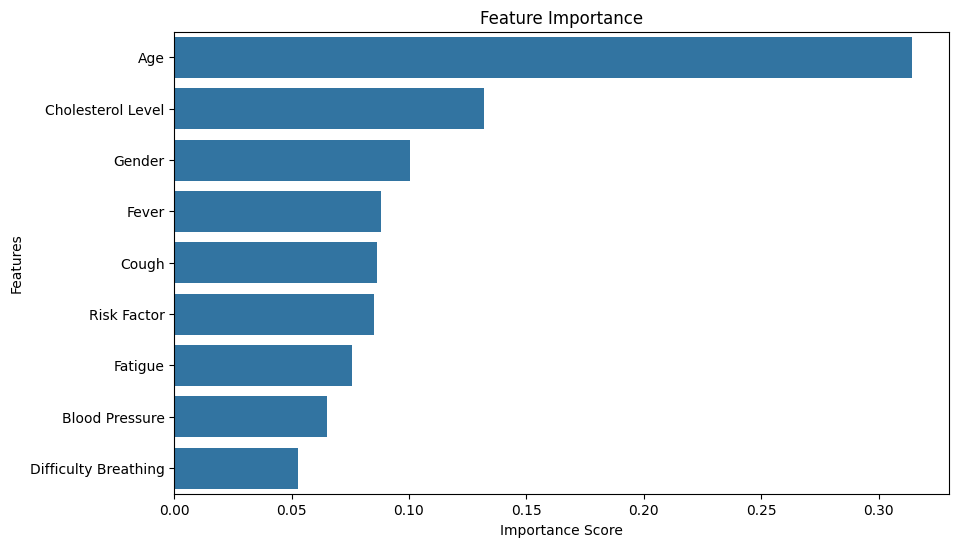

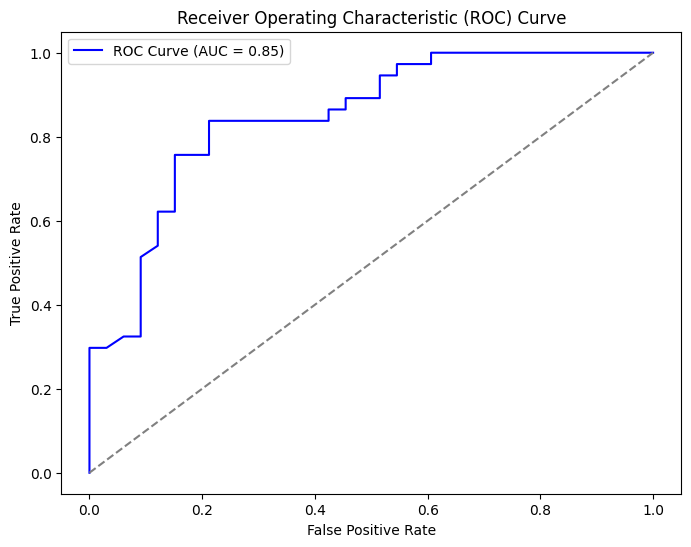

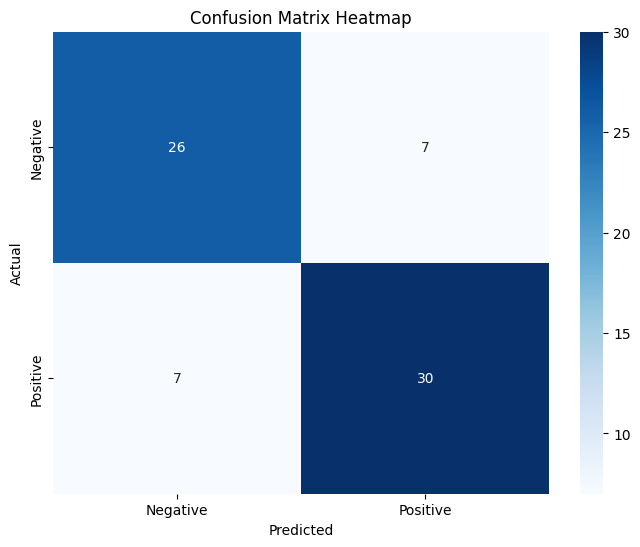

In [ ]:

X = df.drop(columns=['Disease', 'Outcome Variable'])
y = df['Outcome Variable']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
numerical_cols = ['Age', 'Risk Factor']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'CatBoost': CatBoostClassifier(iterations=500, learning_rate=0.05, depth=7, cat_features=[], random_state=42, silent=True)
}

params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

params_xgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 10],
    'n_estimators': [100, 200, 300]
}

params_catboost = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [5, 7, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params_rf, cv=3, n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest parameters:", rf_grid.best_params_)


xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid=params_xgb, cv=3, n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("Best XGBoost parameters:", xgb_grid.best_params_)

catboost_grid = GridSearchCV(CatBoostClassifier(silent=True), param_grid=params_catboost, cv=3, n_jobs=-1)
catboost_grid.fit(X_train, y_train)
print("Best CatBoost parameters:", catboost_grid.best_params_)

best_model = None
best_accuracy = 0
for name, model in models.items():

    if name == 'Random Forest':
        model = rf_grid.best_estimator_
    elif name == 'XGBoost':
        model = xgb_grid.best_estimator_
    elif name == 'CatBoost':
        model = catboost_grid.best_estimator_

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model


print(f"\nBest Model: {best_model.__class__.__name__} with accuracy {best_accuracy:.2f}")

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nFinal Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

print(f"\nBest Model: {best_model.__class__.__name__} with accuracy {best_accuracy:.2f}")


ensemble_model = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.2f}")

final_model = ensemble_model if accuracy_ensemble > best_accuracy else best_model


y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

print("\nFinal Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

if hasattr(final_model, "feature_importances_"):
    feature_importance = pd.Series(final_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
!pip install scikit-learn gradio